# Finite Difference Method

- replace derivatives in a differential equation with approximations
- solve the resulting algebraic equations to get approximate solutions

## Example

ode: 
$$f'=f \\ f(0)=1$$

approximation:
$$
f' \approx \frac{f(x+h)-f(x)}{h} \\
\frac{f(x+h)-f(x)}{h} = f(x) \\
\Rightarrow f(x+h) = (1+h)f(x) \\
\Rightarrow \begin{cases}f_{k+1}=(1+h)f_{k} \\ f_{0}=1\end{cases}
$$

# Numerically Solve 1D Heat Equation

$$
u_{t} = ku_{xx}
$$

Having
$$
u_{x}(x, t) = \frac{u(x, t)-u(x-\Delta x, t)}{\Delta x} \\
u_{x}(x+\Delta x, t) = \frac{u(x+\Delta t, t)-u(x, t)}{\Delta x}
$$
We have
$$
\begin{align}
u_{xx}(x, t) &= \frac{u_{x}(x+\Delta x, t)-u_{x}(x, t)}{\Delta x} \\
&= \frac{\frac{u(x+\Delta t, t)-u(x, t)}{\Delta x}-\frac{u(x, t)-u(x-\Delta x, t)}{\Delta x}}{\Delta x} \\
&= \frac{u(x+\Delta x, t)-2u(x, t)+u(x-\Delta x, t)}{(\Delta x)^{2}}
\end{align} 
$$

Then we have
$$
\frac{u(x, t+\Delta t)-u(x, t)}{\Delta t} \approx k\frac{u(x+\Delta x, t)-2u(x, t)+u(x-\Delta x, t)}{(\Delta x)^{2}} \\
u(x, t+\Delta t) = u(x, t) +\alpha\left[u(x+\Delta x, t)-2u(x, t)+u(x-\Delta x, t)\right]
$$
where $\alpha = \frac{k\Delta t}{(\Delta x)^{2}}$

Let
$$
x_{i} = i\Delta x \\
t_{i} = j \Delta t
$$
The equation can be written as
$$
u_{i, j+1} = u_{i, j} + \alpha(u_{i+1,j}-2u_{i, j}+u_{i-1, j})
$$

# Numerically Solve 2D Heat Equation

$$
u_{t} = k(u_{xx}+u_{yy})
$$

Let
$$
x_{i} = i\Delta x \\
y_{j} = j\Delta y \\
t_{k} = k\Delta t
$$
where i, j, and k are the steps for each difference for x, y, and t respectively. We seek for the solution
$$
u(t, x, y) = u_{i,j}^{k}
$$
We can write the heat equation above using finite-difference method like this
$$
\frac{u_{i, j}^{k+1}-u_{i, j}^{k}}{\Delta t} = k\left[\frac{u_{i+1, j}^{k}-2u_{i, j}^{k}+u_{i-1, j}^{k}}{(\Delta x)^{2}}+\frac{u_{i+1, j}^{k}-2u_{i, j}^{k}+u_{i-1, j}^{k}}{(\Delta y)^{2}}\right]
$$
Taking $\Delta x = \Delta y$
$$
u_{i, j}^{k+1} = \gamma(u_{i+1, j}^{k}+u_{i-1, j}^{k}+u_{i, j+1}^{k}+u_{i, j-1}^{k}-4u_{i, j}^{k})+u_{i, j}^{k}
$$
where $\gamma = k \frac{\Delta t}{\Delta x^{2}}$

Initial and Boundary Conditions

$$
u(x, y, 0) = 0 \\
u(0, y, t) = u(a, y, t) = u(x, 0, t) = 0 \\
u(x, b, t) = 100
$$

![avatar](initial_condition.png)

In [172]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
import math
from scipy.stats import linregress
import scipy.integrate as integrate

In [173]:
plate_length = 50
max_iter_time = 750

k = 2
delta_x = 1

delta_t = (delta_x ** 2)/(4 * k)
gamma = (k * delta_t) / (delta_x ** 2)

In [174]:
u = np.empty((max_iter_time, plate_length, plate_length))

# initial condition
u_initial = 0

# boundary condition
u_top = 100.0
u_left = 0.0
u_bottom = 0.0
u_right = 0.0

# set initial and boundary condition
u.fill(u_initial)

u[:, (plate_length-1):, :] = u_top
u[:, :, :1] = u_left
u[:, :1, 1:] = u_bottom
u[:, :, (plate_length-1):] = u_right

In [175]:
def calculate(u):
    for k in range(0, max_iter_time-1, 1):
        for i in range(1, plate_length-1, delta_x):
            for j in range(1, plate_length-1, delta_x):
                u[k + 1, j, i] = gamma * (u[k][j+1][i] + u[k][j-1][i] + u[k][j][i+1] + u[k][j][i-1] - 4*u[k][j][i]) + u[k][j][i]

    return u
u = calculate(u)

# Periodic Boundary Conditions

Equation:
$$
u_{t} = D(u_{xx}+u_{yy})
$$
Initial Condition:
$$
u(x, y, 0) = 0
$$
Boundary Conditions:
$$
u(x, 0, t) = 0 \\
u(x, L, t) = 100 \\
u(0, y, t) = u(L, y, t) \\
u_{x}(0, y, t) = u_{x}(L, y, t)
$$

In [10]:
u = np.empty((max_iter_time, plate_length, plate_length))

# initial condition
u_initial = 0

# boundary condition
u_top = 100.0
u_bottom = 0.0

# set initial condition
u.fill(u_initial)

# set boundary condition
u[:, (plate_length-1):, :] = u_top
u[:, 0, :] = u_bottom

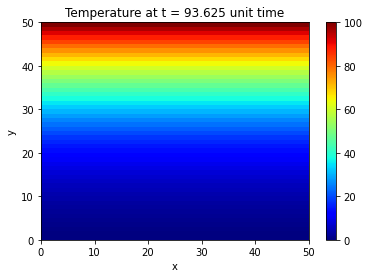

In [12]:
anim = animation.FuncAnimation(plt.figure(), animate, interval=1, frames=max_iter_time, repeat=False)
anim.save("heat_equation_solution_periodict.gif")

# Non-zero initial condition

Initial Condition:
$$
u(x, y, 0) = \sin \frac{\pi y}{L}
$$

In [2]:
plate_length = 50
max_iter_time = 750

k = 2
delta_x = 1

delta_t = (delta_x ** 2)/(4 * k)
gamma = (k * delta_t) / (delta_x ** 2)

In [347]:
u = np.empty((max_iter_time, plate_length, plate_length))

# boundary condition
u_top = 0.0
u_bottom = 0.0

# set boundary condition
u[:, (plate_length-1):, :] = u_top
u[:, 0, :] = u_bottom

# set initial conditon
temp = np.linspace(1, plate_length-2, plate_length-2)
column = np.sin((temp*math.pi)/(plate_length-1))
for i in range(plate_length):
    u[:,1:plate_length-1,i] = column

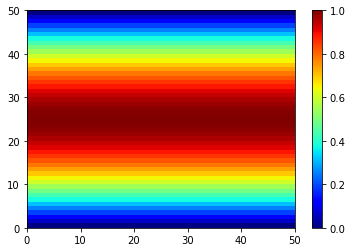

In [348]:
plt.pcolormesh(u[0], cmap=plt.cm.jet, vmin=0, vmax=1)
plt.colorbar()

In [349]:
u = calculate_periodic(u)

In [350]:
def plotheatmap(u_k, k, vmin, vmax):
    # Clear the current plot figure
    plt.clf()

    plt.title(f"Temperature at t = {k*delta_t:.3f} unit time")
    plt.xlabel("x")
    plt.ylabel("y")

    # This is to plot u_k (u at time-step k)
    plt.pcolormesh(u_k, cmap=plt.cm.jet, vmin=0, vmax=1)
    plt.colorbar()

    return plt

def animate(k):
    plotheatmap(u[k], k, vmin=0, vmax=100)

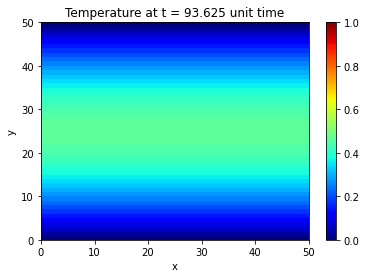

In [351]:
anim = animation.FuncAnimation(plt.figure(), animate, interval=1, frames=max_iter_time, repeat=False)
anim.save("heat_equation_solution_3.gif")

# Solver

In [621]:
def jinteger(i):
    if str(i).split('.')[-1] =='0':
        return True
    else:
        return False
    
def plotheatmap(u_k, k, vmin, vmax):
    # Clear the current plot figure
    plt.clf()

    plt.title(f"Temperature at t = {k*delta_t:.3f} unit time")
    plt.xlabel("x")
    plt.ylabel("y")

    # This is to plot u_k (u at time-step k)
    plt.pcolormesh(u_k, cmap=plt.cm.jet, vmin=0, vmax=1)
    plt.colorbar()

    return plt

class PeriodicSolver:
    
    def __init__(self, plate_length, max_iter_time, delta_x, k, top, bottom, ic_func):
        self.plate_length = plate_length
        self.max_iter_time = max_iter_time
        self.delta_x = delta_x
        self.k = k
        self.ic_func = ic_func
        
        self.delta_t = (self.delta_x )/(4 * self.k * 100)
        self.gamma = (self.k * self.delta_t) / (self.delta_x ** 2)
        
        self.top = top
        self.bottom = bottom
    
    def initialize(self):
        if jinteger(self.plate_length/self.delta_x):
            self.grid_number = int(self.plate_length/self.delta_x)+1
        else:
            print('pick another delta x, initialization fails')
            return False
        self.u = np.empty((self.max_iter_time, self.grid_number, self.grid_number))
        return self.u
        
    def set_initial_conditions(self):
        temp = np.linspace(0, self.plate_length, self.grid_number)
        column = eval(self.ic_func)
        for i in range(self.grid_number):
            self.u[:,:,i] = column
        return self.u
        
    def set_boundary_conditions(self):
        self.u[:, self.grid_number-1:, :] = self.top
        self.u[:, 0, :] = self.bottom
        return self.u
    
    def calculate_periodic(self):
        for k in range(0, self.max_iter_time-1):
            for i in range(0, self.grid_number-1):
                if i==0:
                    for j in range(1, self.grid_number-1):
                        self.u[k+1, j, i] = self.gamma * (self.u[k][j+1][i] + self.u[k][j-1][i] + self.u[k][j][i+1] + self.u[k][j][self.grid_number-2] - 4*self.u[k][j][i]) + self.u[k][j][i]
                        self.u[k+1, j, self.grid_number-1] =  self.u[k+1, j, i]
                else:
                    for j in range(1, self.grid_number-1):
                        self.u[k + 1, j, i] = self.gamma * (self.u[k][j+1][i] + self.u[k][j-1][i] + self.u[k][j][i+1] + self.u[k][j][i-1] - 4*self.u[k][j][i]) + self.u[k][j][i]

        return self.u
    
    def animation(self, file_name):
        def _animate(k):
            plotheatmap(self.u[k], k, vmin=0, vmax=1)

        anim = animation.FuncAnimation(plt.figure(), _animate, interval=1, frames=self.max_iter_time, repeat=False)
        anim.save(file_name)
        
    def compute_sol(self, solutions):
        u_true = np.empty((self.max_iter_time, self.grid_number, self.grid_number))
        for k in range(self.max_iter_time):
            t = k*self.delta_t
            y = np.linspace(0, self.plate_length, self.grid_number)
            y = eval(solutions)
            for i in range(self.grid_number):
                u_true[k,:,i] = y
        return u_true
        
    def main(self, animation):
        self.initialize()
        self.set_initial_conditions()
        self.set_boundary_conditions()
        self.calculate_periodic() 
        
        if animation != False:
            self.animation(animation)
        
        return self.u

In [623]:
delta_x_list = [0.2, 0.02, 0.01, 0.005]
max_iter_time_list = [10, 20, 40, 80]
for i in range(len(delta_x_list)):
    pde = PeriodicSolver(plate_length=1, max_iter_time=max_iter_time_list[i], delta_x=delta_x_list[i], k=2, top=0, bottom=0, ic_func='np.sin((temp*math.pi)/self.plate_length)')
    pde.main(animation=False)
    pde.copute_col()

# 1D Implicit Euler Method

$$
\begin{cases}
u_{t} = u_{xx} \\
u(0, t) = 0 \\
u(1, t) = 0 \\
u(x, 0) = 0.5 \\
\end{cases}
$$

Implicit Euler Method:
$$
\frac{u^{k+1}_{i}-u^{k}_{i}}{\Delta t} = k\frac{u_{i+1}^{k+1}-2u_{i}^{k+1}+u_{i-1}^{k+1}}{(\Delta x)^{2}} \\
(u^{k+1}_{i}-u^{k}_{i}) = \frac{k\Delta t}{(\Delta x)^{2}}(u_{i+1}^{k+1}-2u_{i}^{k+1}+u_{i-1}^{k+1}) \\
u^{k+1}_{i} -\gamma (u_{i+1}^{k+1}-2u_{i}^{k+1}+u_{i-1}^{k+1}) = u^{k}_{i} \\
-\gamma u_{i-1}^{k+1} + (1+2\gamma)u_{i}^{k+1}-\gamma u_{i+1}^{k+1} = u_{i}^{k}
$$
where $\gamma=\frac{k\Delta t}{(\Delta x)^{2}}$

Analytical Solution:
$$
u(x, t) = \sum_{n=odd}^{\infty}\frac{2}{n\pi}\sin(n\pi x)e^{-(n\pi)^{2}t}
$$

This method is first order in time and second order in space, i.e. if $O(\Delta t, \Delta x^{2})$
$$
Error \approx C_{1}\Delta t + C_{2}\Delta x^{2}
$$

In [165]:
# numerical solver for 1D heat equation with homogeneous Dirichlet boundary condition
class OneDBackEulerSolver:
    
    def __init__(self, plate_length, k, delta_x, delta_t, max_iter_time, left, right, u0):
        self.plate_length = plate_length
        self.k = k
        self.delta_x = delta_x
        self.delta_t = delta_t
        self.max_iter_time = max_iter_time
        self.left = left
        self.right = right
        self.u0 = u0
        
        self.gamma = self.k*self.delta_t/(self.delta_x**2)
        self.grid_number = int(self.plate_length/self.delta_x)+1
        
        self.x = np.linspace(0, self.plate_length, self.grid_number)
    
    def initialize(self):
        # initialize matrix A
        self.A = np.zeros((self.grid_number-2, self.grid_number-2))
        for i in range(self.A.shape[0]):
            if i == 0:
                self.A[i, i] = 1+2*self.gamma
                self.A[i, i+1] = -self.gamma
            elif i == self.A.shape[0]-1:
                self.A[i, i] = 1+2*self.gamma
                self.A[i, i-1] = -self.gamma
            else:
                self.A[i, i] = 1+2*self.gamma
                self.A[i, i-1] = -self.gamma
                self.A[i, i+1] = -self.gamma
        
        self.A_inv = np.linalg.inv(self.A)
        
        # initialize matrix u
        self.u = np.zeros((self.grid_number, self.max_iter_time))
        self.u[0, :] = self.left
        self.u[-1, :] = self.right
        self.u[1:-1, 0] = self.u0
        
    def calculate(self):
        # solve Ax=b
        for k in range(1, self.max_iter_time):
            temp = self.u[1:-1, k-1]
            temp[0] = temp[0] +self.gamma*self.left
            temp[-1] = temp[-1] +self.gamma*self.right
            self.u[1:-1, k] = np.matmul(self.A_inv, temp)
            
    def analy_solution(self):
        u_analy = np.zeros((self.grid_number, self.max_iter_time))
        for k in range(self.max_iter_time):
            t = k*self.delta_t
            for i in range(1, 101, 2):
                # compute bn
                #integral = integrate.quad(lambda x: self.u0*np.sin(i*math.pi*x/self.plate_length), 0, self.plate_length)
                #bn = 2/self.plate_length*integral[0]
                #u_analy[:, k] += bn*np.sin(i*math.pi*self.x)*math.e**(-(i*math.pi)**2*t)
                u_analy[:, k] += (2/(i*math.pi))*np.sin(i*math.pi*self.x)*math.e**(-(i*math.pi)**2*t)
        return u_analy
    
    def main(self):
        self.initialize()
        self.calculate()

In [166]:
# convergence test
delta_x_list = [0.005, 0.01, 0.02, 0.05]
t = 200
error_list = []
for j in range(len(delta_x_list)):
    delta_x = delta_x_list[j]
    pde = OneDBackEulerSolver(plate_length=1, k=1, delta_x=delta_x, delta_t=0.001, max_iter_time=850, left=0, right=0, u0=0.5)
    pde.main()
    u = pde.u
    u_analy = pde.analy_solution()
    e = np.linalg.norm(u_analy[:, t]-u[:, t], ord=np.inf)
    error_list.append(e)
error_list

[0.0008616995172300995,
 0.0008669570370319762,
 0.0008879801969444434,
 0.001034831257696836]

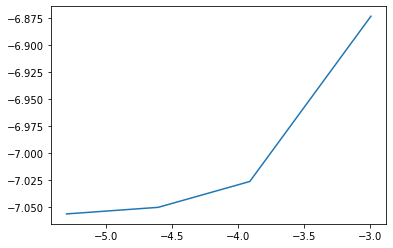

In [167]:
plt.plot(np.log(delta_x_list), np.log(error_list))

In [168]:
linregress(np.log(delta_x_list), np.log(error_list))

LinregressResult(slope=0.07827770917114267, intercept=-6.6728143780914415, rvalue=0.8902873974793643, pvalue=0.10971260252063575, stderr=0.028312946078882673, intercept_stderr=0.1214144294881854)

# Backward differentiation formula

$$
\frac{3u_{i}^{k+1}-4u_{i}^{k}+u_{i}^{k-1}}{2\Delta t} = k\frac{u_{i+1}^{k+1}-2u_{i}^{k+1}+u_{i-1}^{k+1}}{(\Delta x)^{2}} \\
3u_{i}^{k+1}-4u_{i}^{k}+u_{i}^{k-1} = \frac{2k\Delta t}{(\Delta x)^{2}}(u_{i+1}^{k+1}-2u_{i}^{k+1}+u_{i-1}^{k+1}) \\
3u^{k+1}_{i} -\gamma (u_{i+1}^{k+1}-2u_{i}^{k+1}+u_{i-1}^{k+1}) = 4u^{k}_{i}-u_{i}^{k-1} \\
-\gamma u_{i-1}^{k+1} + (3+2\gamma)u_{i}^{k+1}-\gamma u_{i+1}^{k+1} = 4u^{k}_{i}-u_{i}^{k-1}
$$
where $\gamma = \frac{2k\Delta t}{(\Delta x)^{2}}$

In [176]:
# numerical solver for 1D heat equation with homogeneous Dirichlet boundary condition
class OneDBdfSolver:
    
    def __init__(self, plate_length, k, delta_x, delta_t, max_iter_time, left, right, u0):
        self.plate_length = plate_length
        self.k = k
        self.delta_x = delta_x
        self.delta_t = delta_t
        self.max_iter_time = max_iter_time
        self.left = left
        self.right = right
        self.u0 = u0
        
        self.gamma = 2*self.k*self.delta_t/(self.delta_x**2)
        self.grid_number = int(self.plate_length/self.delta_x)+1
        
        self.x = np.linspace(0, self.plate_length, self.grid_number)
    
    def initialize(self):
        # initialize matrix A
        self.A = np.zeros((self.grid_number-2, self.grid_number-2))
        for i in range(self.A.shape[0]):
            if i == 0:
                self.A[i, i] = 3+2*self.gamma
                self.A[i, i+1] = -self.gamma
            elif i == self.A.shape[0]-1:
                self.A[i, i] = 3+2*self.gamma
                self.A[i, i-1] = -self.gamma
            else:
                self.A[i, i] = 3+2*self.gamma
                self.A[i, i-1] = -self.gamma
                self.A[i, i+1] = -self.gamma
        
        self.A_inv = np.linalg.inv(self.A)
        
        # initialize matrix u
        self.u = np.zeros((self.grid_number, self.max_iter_time))
        self.u[0, :] = self.left
        self.u[-1, :] = self.right
        self.u[1:-1, 0] = self.u0
        
    def calculate(self):
        # use Backward Euler Method to compute u1
        pde = OneDBackEulerSolver(plate_length=self.plate_length, k=self.k, delta_x=self.delta_x, delta_t=self.delta_t, max_iter_time=2, left=self.left, right=self.right, u0=self.u0)
        pde.main()
        self.u[:, 1] = pde.u[:, 1]
        
        # solve Ax=b
        for k in range(2, self.max_iter_time):
            temp = 4*self.u[1:-1, k-1] - self.u[1:-1, k-2]
            temp[0] = temp[0] +self.gamma*self.left
            temp[-1] = temp[-1] +self.gamma*self.right
            self.u[1:-1, k] = np.matmul(self.A_inv, temp)
    
    def analy_solution(self):
        u_analy = np.zeros((self.grid_number, self.max_iter_time))
        for k in range(self.max_iter_time):
            t = k*self.delta_t
            for i in range(1, 101, 2):
                #integral = integrate.quad(lambda x: self.u0*np.sin(i*math.pi*x/self.plate_length), 0, self.plate_length)
                #bn = 2/self.plate_length*integral[0]
                #u_analy[:, k] += bn*np.sin(i*math.pi*self.x)*math.e**(-(i*math.pi)**2*t)
                u_analy[:, k] += (2/(i*math.pi))*np.sin(i*math.pi*self.x)*math.e**(-(i*math.pi)**2*t)
        return u_analy
    
    def main(self):
        self.initialize()
        self.calculate()

In [183]:
delta_x_list = [0.005, 0.01, 0.02, 0.05]
t = 200
error_list = []
for j in range(len(delta_x_list)):
    delta_x = delta_x_list[j]
    pde = OneDBdfSolver(plate_length=1, k=1, delta_x=delta_x, delta_t=0.001, max_iter_time=750, left=0, right=0, u0=0.5)
    pde.main()
    u = pde.u
    u_analy = pde.analy_solution()
    e = np.linalg.norm(u_analy[:, t]-u[:, t], ord=np.inf)
    #e = sum((u_analy[:, t]-u[:, t])**2)
    error_list.append(e)

LinregressResult(slope=1.8492587460643715, intercept=-3.154328931099136, rvalue=0.999036400639596, pvalue=0.0009635993604040211, stderr=0.05744602380598814, intercept_stderr=0.24634583018440925)

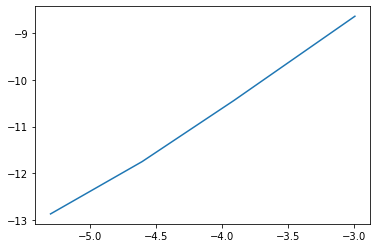

In [185]:
plt.plot(np.log(delta_x_list), np.log(error_list))
linregress(np.log(delta_x_list), np.log(error_list))

In [180]:
delta_t_list = [0.001, 0.002, 0.004, 0.008]
t_list = [200, 100, 50, 25]
error_list = []
for j in range(len(delta_t_list)):
    delta_t = delta_t_list[j]
    t = t_list[j]
    pde = OneDBdfSolver(plate_length=1, k=1, delta_x=0.01, delta_t=delta_t, max_iter_time=750, left=0, right=0, u0=0.5)
    pde.main()
    u = pde.u
    u_analy = pde.analy_solution()
    e = np.linalg.norm(u_analy[:, t]-u[:, t], ord=np.inf)
    #e = sum((u_analy[:, t]-u[:, t])**2)
    error_list.append(e)

[7.877343425596872e-06,
 1.0267951980960643e-05,
 1.9929829693010603e-05,
 6.0144296670616715e-05]

LinregressResult(slope=2.022492864565188, intercept=0.9416445310415167, rvalue=0.9938272870192609, pvalue=0.006172712980739069, stderr=0.1596404314785287, intercept_stderr=0.9449094787928662)

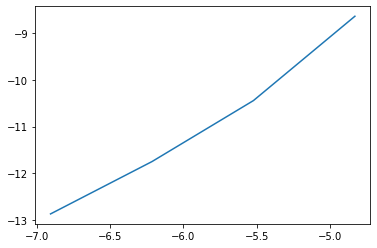

In [186]:
plt.plot(np.log(delta_t_list), np.log(error_list))
linregress(np.log(delta_t_list), np.log(error_list))